# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    ray_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1.4, 1, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/tournament/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=TournamentSelectionFilter(tournament_size=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params, corn_params, grid_params],
        shape_gene_pool=[
            ray_params
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/tournament/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: TournamentSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/biased_fitn

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

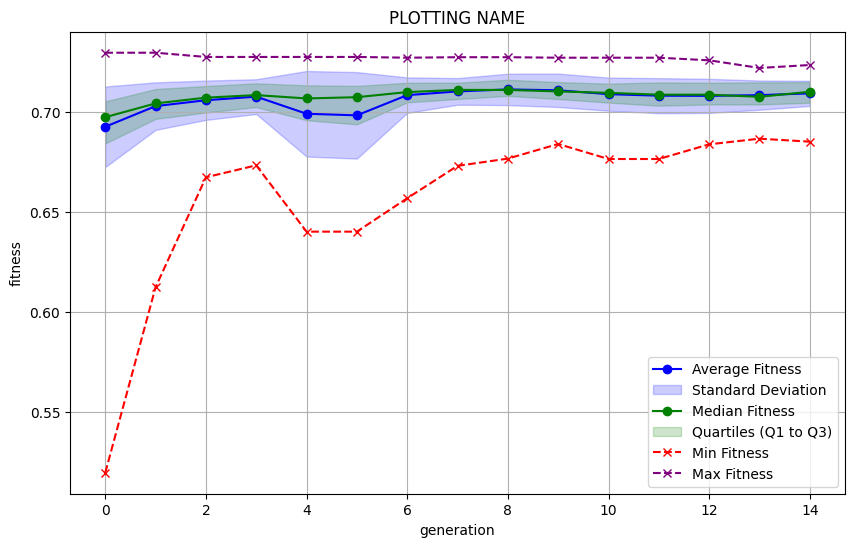

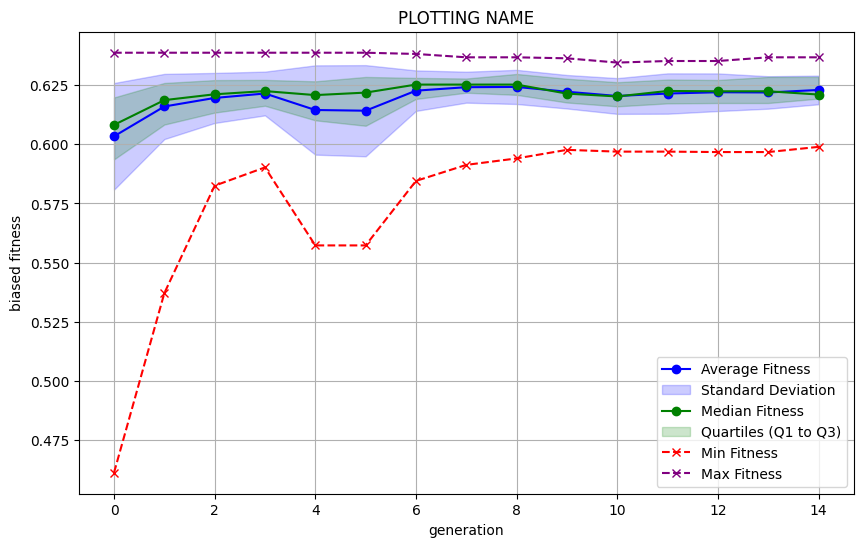

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_138: ['RayShape_235', 'CornerTransformation_131']
predict: (0.28894128305463074, 373.46970350000004, 456.63905159999996)
biased_fitness: 0.6241954165351694, fitness: 0.7100433939536925
shape parameter:
parameter_list: [ upper_slope: 2.4835299056269147, nose_point: 2.1477532001253543, lower_coefficient: 3.478954905451647, lower_x-intercept: 3.155610541541723, lower_y-intercept: 1.3500600777307734, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


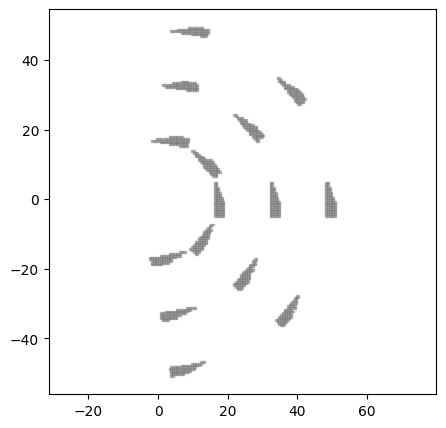

--------------------------------------------------
label: VentHole Chromosome_116: ['RayShape_181', 'CornerTransformation_380']
predict: (0.2898831924004188, 372.98684789999993, 458.43080079999976)
biased_fitness: 0.6098394652941371, fitness: 0.6940798324958132
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 3.1103029476010873, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


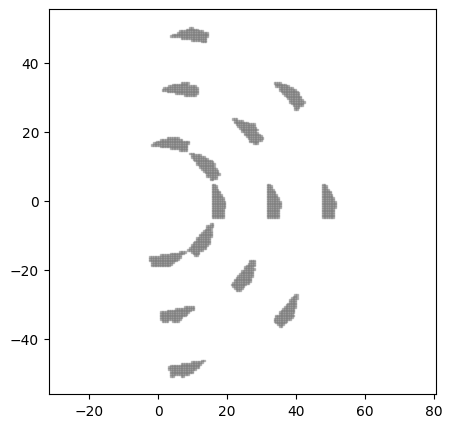

--------------------------------------------------
label: VentHole Chromosome_414: ['RayShape_116', 'CornerTransformation_131']
predict: (0.2893481120495087, 373.6099053000001, 455.01961149999994)
biased_fitness: 0.6210376818068775, fitness: 0.7133712955049125
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 3.1103029476010873, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


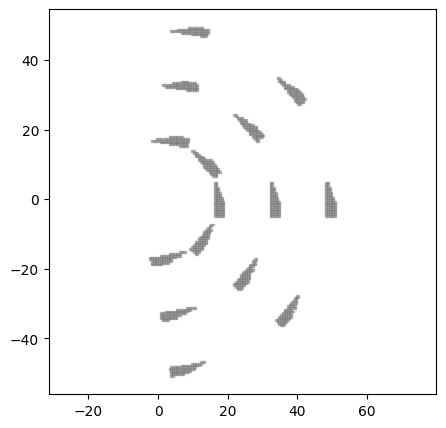

--------------------------------------------------
label: VentHole Chromosome_294: ['RayShape_440', 'CornerTransformation_131']
predict: (0.2885982476807989, 372.8232056999999, 457.6837487)
biased_fitness: 0.6301410065688159, fitness: 0.7114827511920114
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


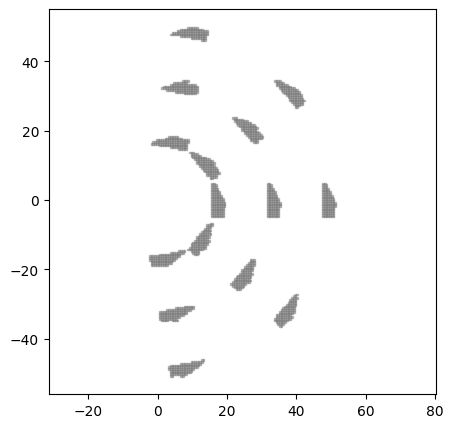

--------------------------------------------------
label: VentHole Chromosome_440: ['RayShape_131', 'CornerTransformation_166']
predict: (0.28965050307759443, 372.82802639999994, 455.3783176999999)
biased_fitness: 0.6199961895136783, fitness: 0.7124632487240563
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 3.1103029476010873, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


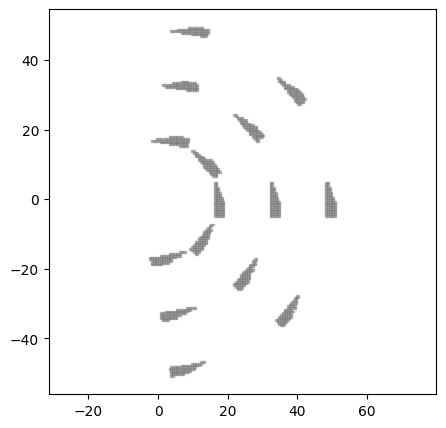

--------------------------------------------------
label: VentHole Chromosome_131: ['RayShape_440', 'CornerTransformation_138']
predict: (0.2893153049966797, 372.7100690999999, 458.3582563)
biased_fitness: 0.6193188719464849, fitness: 0.7015053230332037
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 3.1103029476010873, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


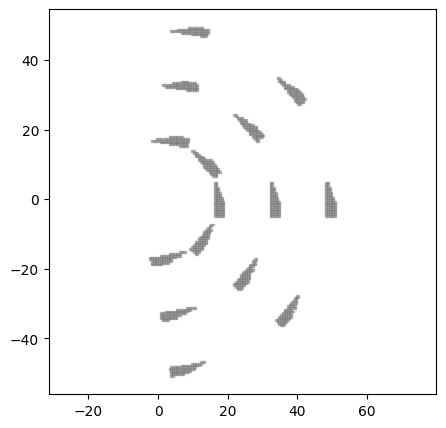

--------------------------------------------------
label: VentHole Chromosome_155: ['RayShape_294', 'CornerTransformation_440']
predict: (0.2888135225759334, 373.27773149999996, 455.86620109999984)
biased_fitness: 0.6284896242369327, fitness: 0.7161451112406668
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


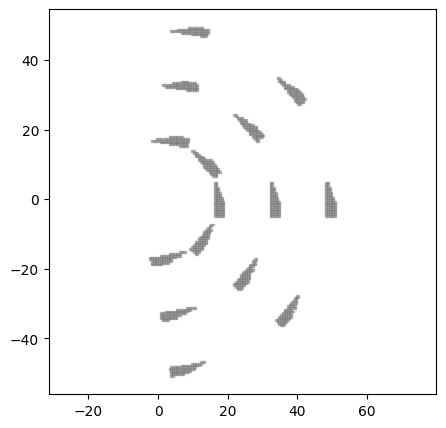

--------------------------------------------------
label: VentHole Chromosome_131: ['RayShape_138', 'CornerTransformation_440']
predict: (0.2893425859671275, 373.0024602000001, 454.0307509999999)
biased_fitness: 0.6261299934602149, fitness: 0.7214080843287252
shape parameter:
parameter_list: [ upper_slope: 2.4835299056269147, nose_point: 2.1477532001253543, lower_coefficient: 3.478954905451647, lower_x-intercept: 3.155610541541723, lower_y-intercept: 1.3500600777307734, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


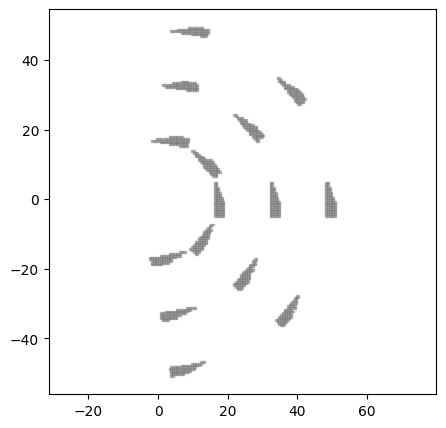

--------------------------------------------------
label: VentHole Chromosome_131: ['RayShape_380', 'CornerTransformation_131']
predict: (0.28852202437186736, 373.02324250000004, 456.68936460000003)
biased_fitness: 0.6321967170938566, fitness: 0.716216720781326
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


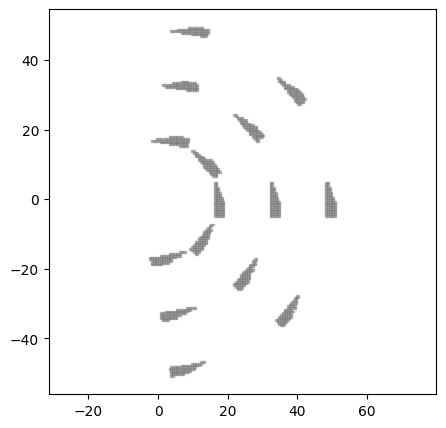

--------------------------------------------------
label: VentHole Chromosome_138: ['RayShape_116', 'CornerTransformation_155']
predict: (0.2891053407886084, 373.1831044000001, 456.49953899999986)
biased_fitness: 0.6236106289594822, fitness: 0.7105333751139161
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


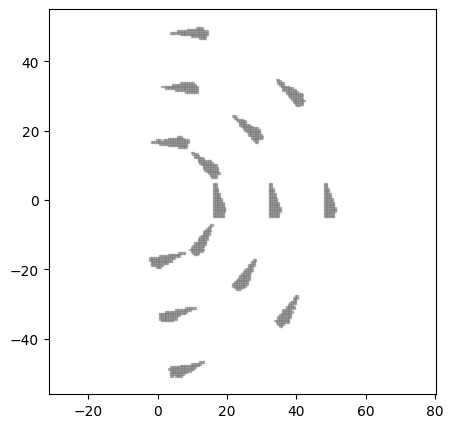

--------------------------------------------------
label: VentHole Chromosome_131: ['RayShape_380', 'CornerTransformation_83']
predict: (0.28835800788307386, 373.07757019999997, 456.6781498)
biased_fitness: 0.6342437390369658, fitness: 0.7176413211692613
shape parameter:
parameter_list: [ upper_slope: 2.4835299056269147, nose_point: 2.1477532001253543, lower_coefficient: 3.478954905451647, lower_x-intercept: 3.155610541541723, lower_y-intercept: 1.3500600777307734, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


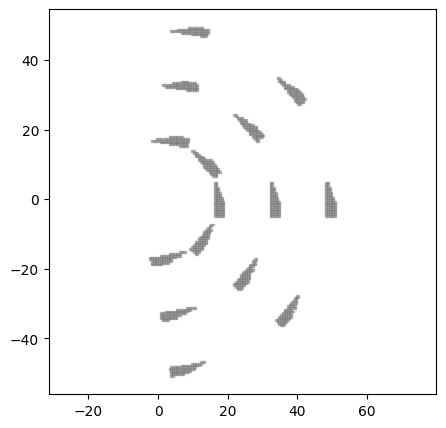

--------------------------------------------------
label: VentHole Chromosome_235: ['RayShape_138', 'CornerTransformation_235']
predict: (0.2893153049966797, 372.7100690999999, 458.3582563)
biased_fitness: 0.6193188719464849, fitness: 0.7015053230332037
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


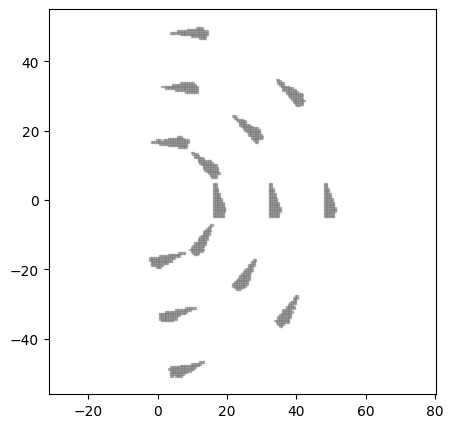

--------------------------------------------------
label: VentHole Chromosome_294: ['RayShape_155', 'CornerTransformation_166']
predict: (0.28904555642561314, 373.4669911000001, 457.5023385000002)
biased_fitness: 0.6210225775414152, fitness: 0.7046977877438673
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


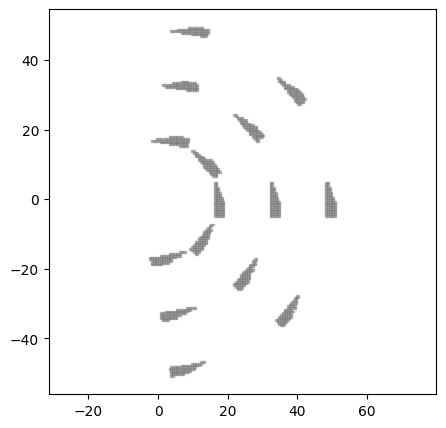

--------------------------------------------------
label: VentHole Chromosome_83: ['RayShape_137', 'CornerTransformation_440']
predict: (0.2893153049966797, 372.7100690999999, 458.3582563)
biased_fitness: 0.6193188719464849, fitness: 0.7015053230332037
shape parameter:
parameter_list: [ upper_slope: 2.4835299056269147, nose_point: 2.1477532001253543, lower_coefficient: 3.478954905451647, lower_x-intercept: 3.155610541541723, lower_y-intercept: 1.3500600777307734, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


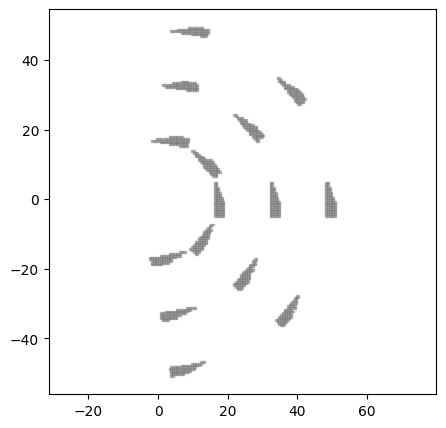

--------------------------------------------------
label: VentHole Chromosome_83: ['RayShape_116', 'CornerTransformation_440']
predict: (0.2893153049966797, 372.7100690999999, 458.3582563)
biased_fitness: 0.6193188719464849, fitness: 0.7015053230332037
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


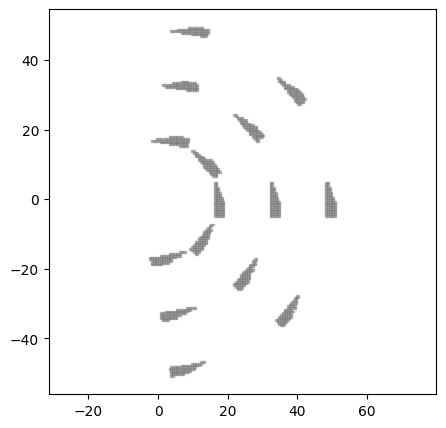

--------------------------------------------------
label: VentHole Chromosome_83: ['RayShape_294', 'CornerTransformation_83']
predict: (0.28930436653191705, 373.4379218000002, 456.49467629999975)
biased_fitness: 0.6195599069531608, fitness: 0.7072933441808297
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


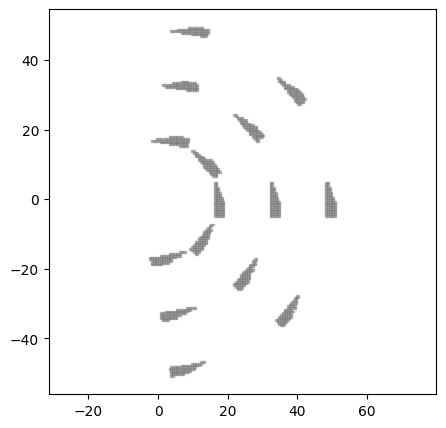

--------------------------------------------------
label: VentHole Chromosome_166: ['RayShape_166', 'CornerTransformation_235']
predict: (0.2893481120495087, 373.6099053000001, 455.01961149999994)
biased_fitness: 0.6210376818068775, fitness: 0.7133712955049125
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 3.1103029476010873, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


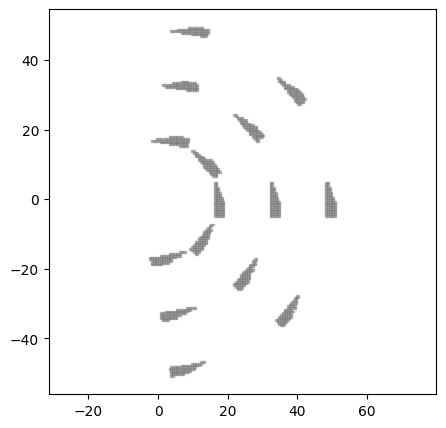

--------------------------------------------------
label: VentHole Chromosome_131: ['RayShape_83', 'CornerTransformation_137']
predict: (0.2893630776315219, 373.34797430000015, 457.15251979999994)
biased_fitness: 0.6178720020586924, fitness: 0.7038667531847803
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


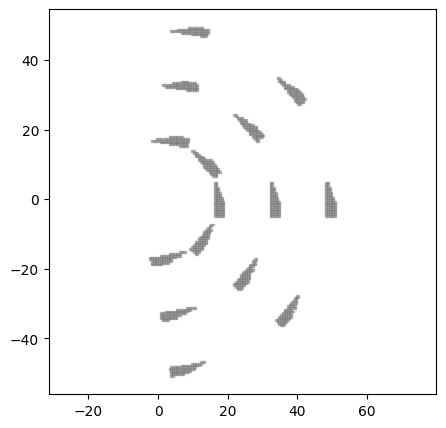

--------------------------------------------------
label: VentHole Chromosome_131: ['RayShape_83', 'CornerTransformation_83']
predict: (0.28963809415011266, 373.595179, 454.7076257999999)
biased_fitness: 0.617675535298423, fitness: 0.712105034498874
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


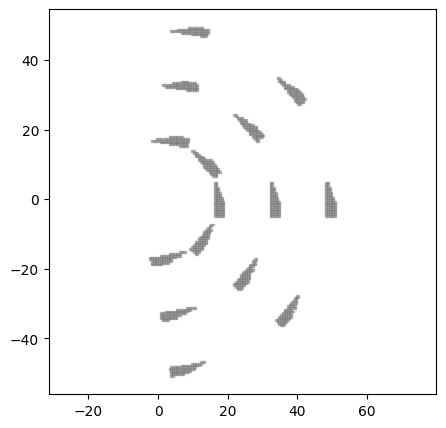

--------------------------------------------------
label: VentHole Chromosome_25: ['RayShape_131', 'CornerTransformation_131']
predict: (0.2899704903447775, 373.25239090000025, 457.004333)
biased_fitness: 0.6101425146731135, fitness: 0.6990114770522237
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


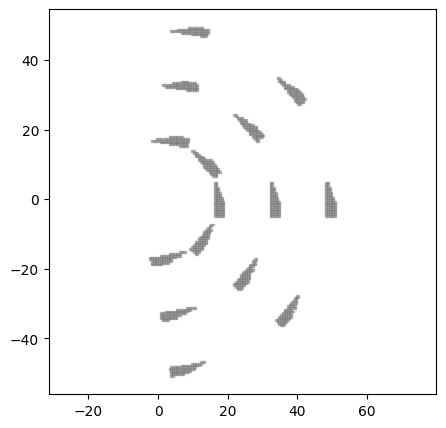

--------------------------------------------------
label: VentHole Chromosome_166: ['RayShape_235', 'CornerTransformation_197']
predict: (0.2888288241763797, 373.49388450000004, 456.77230149999997)
biased_fitness: 0.6253824360306843, fitness: 0.7103808282362032
shape parameter:
parameter_list: [ upper_slope: 2.4835299056269147, nose_point: 2.1477532001253543, lower_coefficient: 3.478954905451647, lower_x-intercept: 3.155610541541723, lower_y-intercept: 1.3500600777307734, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


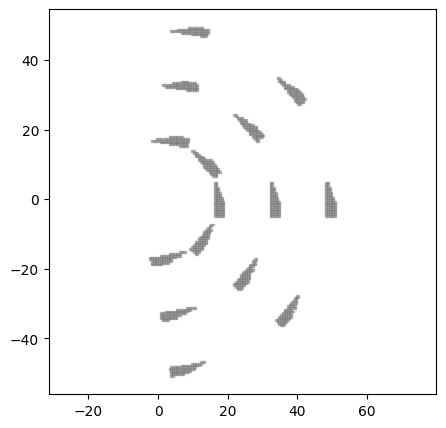

--------------------------------------------------
label: VentHole Chromosome_440: ['RayShape_25', 'CornerTransformation_414']
predict: (0.289835863133868, 373.28724419999986, 456.48587369999996)
biased_fitness: 0.6128899477258487, fitness: 0.7027757791613208
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


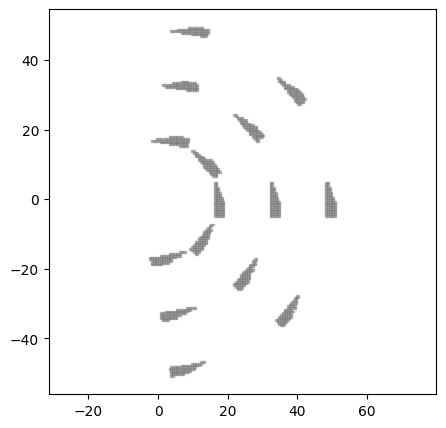

--------------------------------------------------
label: VentHole Chromosome_131: ['RayShape_83', 'CornerTransformation_131']
predict: (0.28924811055632116, 372.7149426999998, 457.5820431000001)
biased_fitness: 0.6217876525115044, fitness: 0.7060339654367888
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


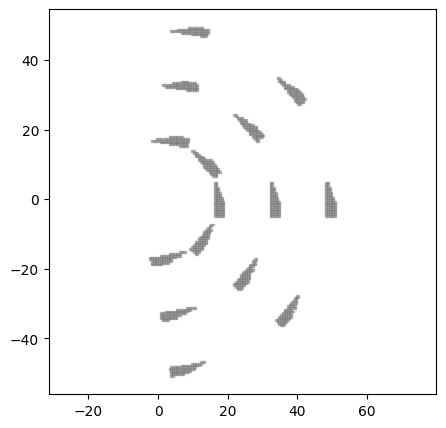

--------------------------------------------------
label: VentHole Chromosome_235: ['RayShape_131', 'CornerTransformation_166']
predict: (0.2887314523026263, 373.18086220000004, 455.9351258999999)
biased_fitness: 0.6299851049632315, fitness: 0.7171055364737371
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


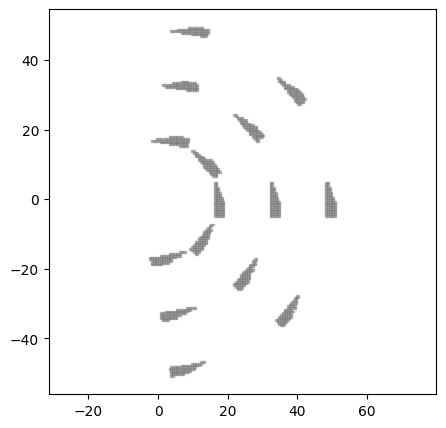

--------------------------------------------------
label: VentHole Chromosome_235: ['RayShape_166', 'CornerTransformation_83']
predict: (0.2887457828282325, 373.14498360000005, 454.64441370000003)
biased_fitness: 0.6325452950047448, fitness: 0.7235951852176746
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


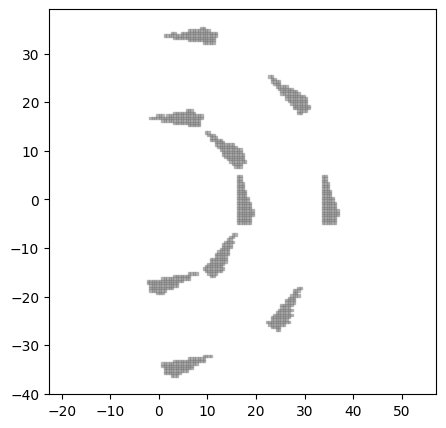

--------------------------------------------------
label: VentHole Chromosome_235: ['RayShape_294', 'CornerTransformation_235']
predict: (0.28877086815413966, 372.93001280000004, 456.6784238999999)
biased_fitness: 0.6292009340420446, fitness: 0.7142491349586034
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


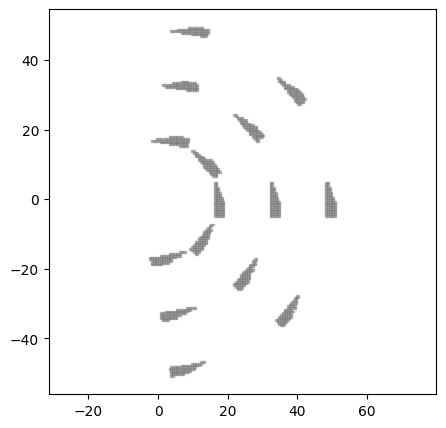

--------------------------------------------------
label: VentHole Chromosome_138: ['RayShape_131', 'CornerTransformation_155']
predict: (0.2888288241763797, 373.49388450000004, 456.77230149999997)
biased_fitness: 0.6253824360306843, fitness: 0.7103808282362032
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


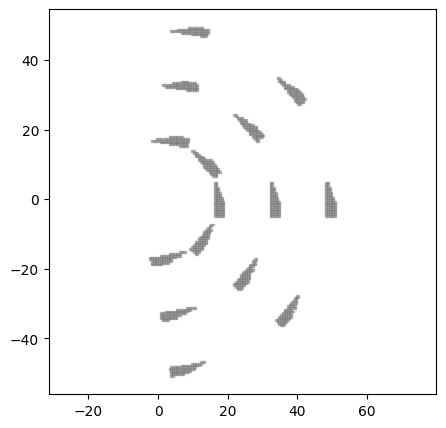

--------------------------------------------------
label: VentHole Chromosome_138: ['RayShape_138', 'CornerTransformation_137']
predict: (0.2899819364978078, 373.64721679999997, 459.33889259999984)
biased_fitness: 0.6033390198306913, fitness: 0.6852500880219229
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


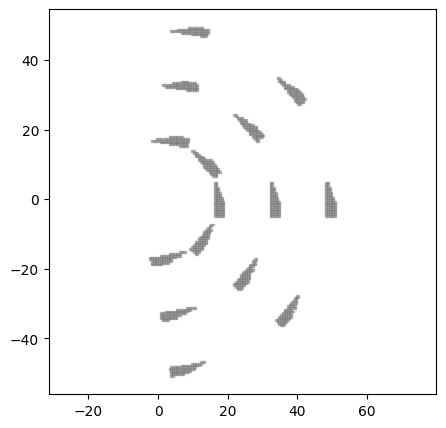

--------------------------------------------------
label: VentHole Chromosome_116: ['RayShape_235', 'CornerTransformation_138']
predict: (0.2890776498067358, 373.416161, 456.19867899999997)
biased_fitness: 0.623434739705699, fitness: 0.7111493019326423
shape parameter:
parameter_list: [ upper_slope: 2.916084583117226, nose_point: 1.6691340847906206, lower_coefficient: 2.8036728212803657, lower_x-intercept: 3.1932272104983586, lower_y-intercept: 1.7413847241000964, ]
pattern parameter:
parameter_list: [ di: 11.83203685743732, dx: 6.048544048162399, phi: 0.6981317007977318, rot_count: 6.0, ]


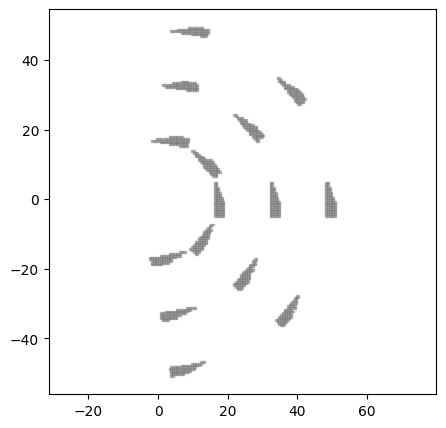

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )